### 数据概况
一般而言，对于数据在比赛界面都有对应的数据概况介绍（匿名特征除外），说明列的性质特征。了解列的性质会有助于我们对于数据的理解和后续分析。 Tip:匿名特征，就是未告知数据列所属的性质的特征列。

train.csv

* id 为贷款清单分配的唯一信用证标识
* loanAmnt 贷款金额
* term 贷款期限（year）
* interestRate 贷款利率
* installment 分期付款金额
* grade 贷款等级
* subGrade 贷款等级之子级
* employmentTitle 就业职称
* employmentLength 就业年限（年）
* homeOwnership 借款人在登记时提供的房屋所有权状况
* annualIncome 年收入
* verificationStatus 验证状态
* issueDate 贷款发放的月份
* purpose 借款人在贷款申请时的贷款用途类别
* postCode 借款人在贷款申请中提供的邮政编码的前3位数字
* regionCode 地区编码
* dti 债务收入比
* delinquency_2years 借款人过去2年信用档案中逾期30天以上的违约事件数
* ficoRangeLow 借款人在贷款发放时的fico所属的下限范围
* ficoRangeHigh 借款人在贷款发放时的fico所属的上限范围
* openAcc 借款人信用档案中未结信用额度的数量
* pubRec 贬损公共记录的数量
* pubRecBankruptcies 公开记录清除的数量
* revolBal 信贷周转余额合计
* revolUtil 循环额度利用率，或借款人使用的相对于所有可用循环信贷的信贷金额
* totalAcc 借款人信用档案中当前的信用额度总数
* initialListStatus 贷款的初始列表状态
* applicationType 表明贷款是个人申请还是与两个共同借款人的联合申请
* earliesCreditLine 借款人最早报告的信用额度开立的月份
* title 借款人提供的贷款名称
* policyCode 公开可用的策略_代码=1新产品不公开可用的策略_代码=2
* n系列匿名特征 匿名特征n0-n14，为一些贷款人行为计数特征的处理

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('./Data/train.csv')
testA = pd.read_csv('./Data/testA.csv')

In [3]:
print('Train data shape:',train.shape)
print('TestA data shape:',testA.shape)

Train data shape: (800000, 47)
TestA data shape: (200000, 48)


In [4]:
train.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [5]:
train.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n2.1', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

### 分类指标评价计算示例

In [6]:
## 混淆矩阵
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred = [0, 1, 0, 1]
y_true = [0, 1, 1, 0]
print('混淆矩阵:\n',confusion_matrix(y_true, y_pred))

混淆矩阵:
 [[1 1]
 [1 1]]


In [7]:
## accuracy
from sklearn.metrics import accuracy_score
y_pred = [0, 1, 0, 1]
y_true = [0, 1, 1, 0]
print('ACC:',accuracy_score(y_true, y_pred))

ACC: 0.5


In [8]:
## Precision,Recall,F1-score
from sklearn import metrics
y_pred = [0, 1, 0, 1]
y_true = [0, 1, 1, 0]
print('Precision',metrics.precision_score(y_true, y_pred))
print('Recall',metrics.recall_score(y_true, y_pred))
print('F1-score:',metrics.f1_score(y_true, y_pred))

Precision 0.5
Recall 0.5
F1-score: 0.5


In [9]:
## P-R曲线
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
plt.plot(precision, recall)

Text(0.5,0,'FPR')

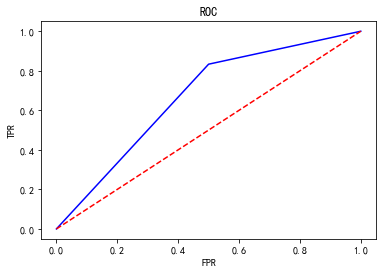

In [10]:
## ROC曲线
from sklearn.metrics import roc_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
FPR,TPR,thresholds=roc_curve(y_true, y_pred)
plt.title('ROC')
plt.plot(FPR, TPR,'b')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')

In [11]:
## AUC
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
print('AUC socre:',roc_auc_score(y_true, y_scores))

AUC socre: 0.75


In [12]:
## KS值 在实际操作时往往使用ROC曲线配合求出KS值
from sklearn.metrics import roc_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 1, 1]
FPR,TPR,thresholds=roc_curve(y_true, y_pred)
KS=abs(FPR-TPR).max()
print('KS值：',KS)

KS值： 0.5238095238095237


### 评分卡（拓展知识）

In [13]:
#评分卡 不是标准评分卡
def Score(prob,P0=600,PDO=20,badrate=None,goodrate=None):
    P0 = P0
    PDO = PDO
    theta0 = badrate/goodrate
    B = PDO/np.log(2)
    A = P0 + B*np.log(2*theta0)
    score = A-B*np.log(prob/(1-prob))
    return score

### 经验总结

赛题理解是开始比赛的第一步，赛题的理解有助于对竞赛全局的把握。通过赛题理解有助于对赛题的业务逻辑把握，对于后期的特征工程构建和模型选择都尤为重要。

* 在开始比赛之前要对赛题进行充分的了解。
* 比赛什么时候开始，什么时候结束，什么时候换B榜数据。
* 和该比赛有没有类似的比赛可以参考借鉴。
* 线上提交结果的次数往往是有限的，提前了解每日可以提交的次数。
* 比赛使用的是什么评价指标，可以选择相同的评价指标作为线下验证的方式。